In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

(2580, 81)

In [2]:
pd.set_option('display.max_columns', None)
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [3]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [4]:
#dropping columns we don't need
housing.drop(['MSZoning','LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',\
              'Utilities', 'LotConfig', 'LandSlope','Foundation','KitchenQual',\
              'GarageYrBlt','GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',\
              'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',\
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolQC', 'MiscFeature', 'MiscVal', \
              'MoSold','SaleCondition','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', \
              '1stFlrSF', '2ndFlrSF','BsmtFinType1', 'BsmtFinType2','MasVnrArea','Functional',\
              'KitchenAbvGr', 'TotRmsAbvGrd','GarageCars','PoolArea','Condition1','Condition2',\
              'Electrical','BsmtExposure','CentralAir']\
             , axis=1, inplace=True)

In [5]:
#separating the columns to numeric and categorical
numeric_data = housing.select_dtypes(include=[np.number])
numeric_data.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'YrSold'],
      dtype='object')

In [6]:
categorical_data = housing.select_dtypes(exclude=[np.number])
categorical_data.columns

Index(['Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'Heating', 'HeatingQC', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'Fence', 'SaleType'],
      dtype='object')

In [7]:
import numpy as np
nans = np.sum(housing.isnull())
nans[nans > 0].sort_values(ascending=False)

Fence           2055
FireplaceQu     1241
GarageQual       129
GarageFinish     129
GarageType       127
BsmtCond          69
BsmtQual          69
MasVnrType        14
BsmtHalfBath       2
BsmtFullBath       2
dtype: int64

In [8]:
#print(df.isnull().sum().to_string())

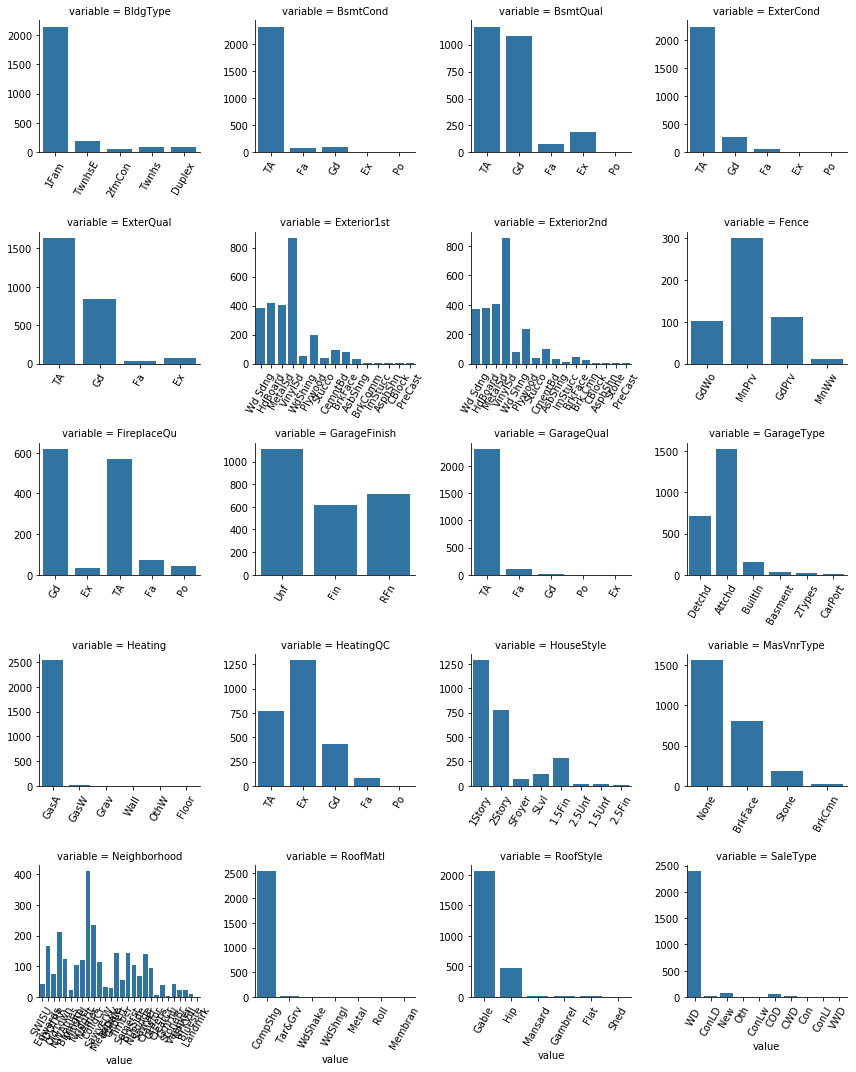

In [22]:
#checking categorical data to see how to transform it
f = pd.melt(categorical_data, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()
# f = pd.melt(numeric_data)
# g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
# g = g.map(sns.distplot, 'value')

In [10]:
housing.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

housing.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

housing.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

housing.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

housing.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

housing.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

housing.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

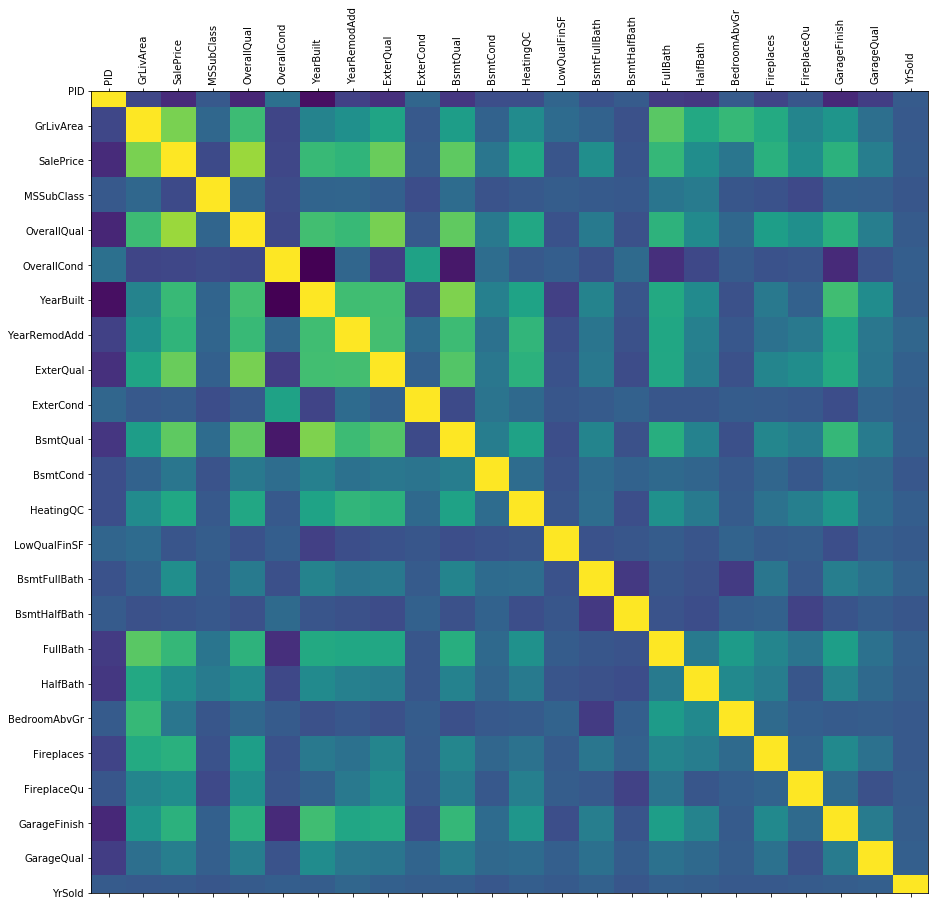

In [11]:
#checking for multicollinearity:
corr = housing.corr()
fix, ax = plt.subplots(figsize=(15,15))
sns.heatmap
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);
# corr = housing.corr()
# plt.figure(figsize = (16,12))
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)

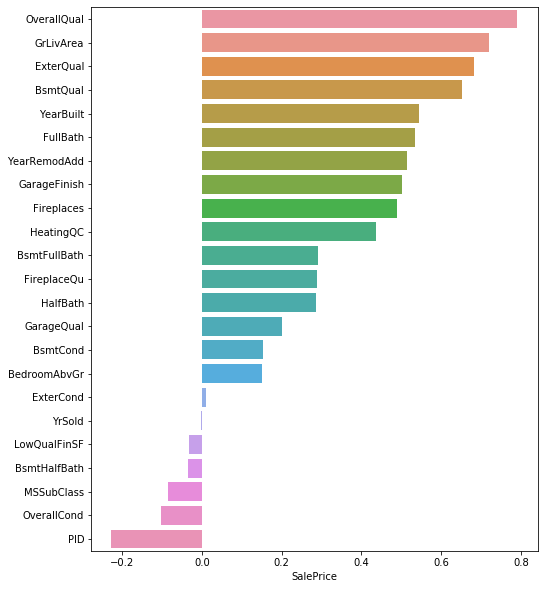

In [12]:
#checking for correlations of the numerical data with the SalePrice
corr = corr.sort_values('SalePrice', ascending=False)
plt.rcParams['figure.figsize'] = (8.0, 10.0)
sns.barplot( corr.SalePrice[1:], corr.index[1:])
plt.show()

In [13]:
#imputing zeroes
housing.Fence.fillna(0,inplace=True)
housing.GarageFinish.fillna(0,inplace=True)
housing.FireplaceQu.fillna(0,inplace=True)
housing.GarageQual.fillna(0,inplace=True)
housing.BsmtCond.fillna(0,inplace=True)
housing.BsmtQual.fillna(0,inplace=True)
housing.BsmtHalfBath.fillna(0,inplace=True)
housing.BsmtFullBath.fillna(0,inplace=True)

In [14]:
#proposing to add bathrooms: full and half = 1.5
#add bathrooms of living area and basement 

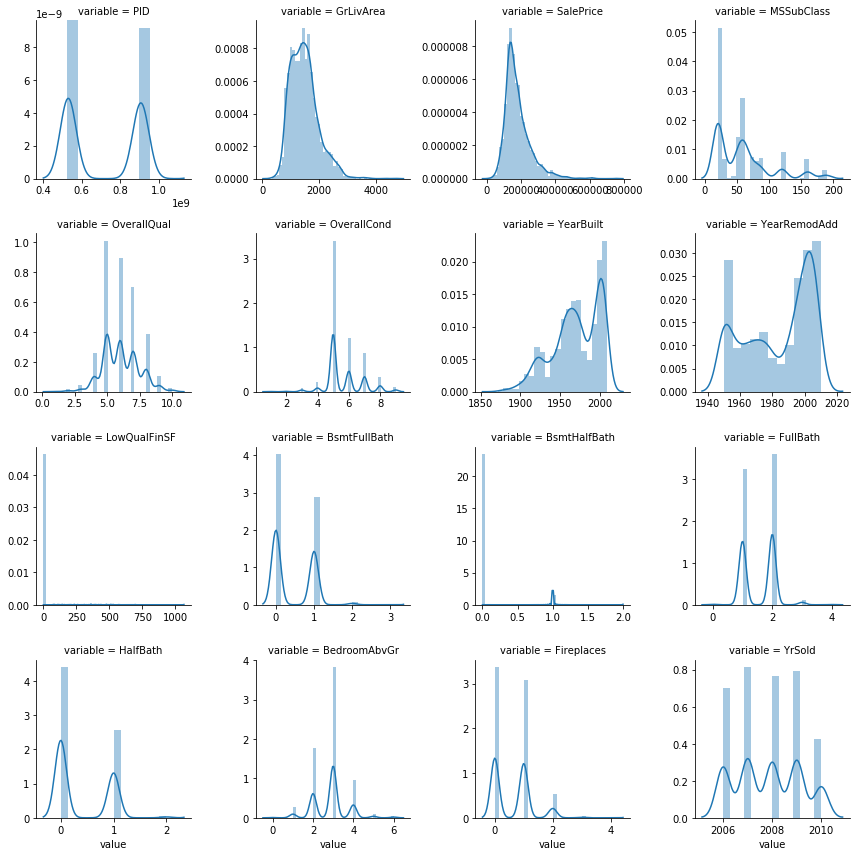

In [15]:
#checking for normality
f = pd.melt(numeric_data)
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [16]:
#checking the neighborhoods
housing['Neighborhood']
neighborhoods_value = pd.DataFrame((housing.groupby('Neighborhood')['SalePrice'].sum()/housing.groupby('Neighborhood')['PID'].count()))
neighborhoods_value = neighborhoods_value.reset_index()
neighborhoods_value.columns = ['Neighborhood','Price_by_NumofHouses_Ratio']
round(neighborhoods_value.sort_values('Price_by_NumofHouses_Ratio',ascending=False))

,Neighborhood,Price_by_NumofHouses_Ratio
18,NoRidge,326114.0
19,NridgHt,313662.0
25,StoneBr,305308.0
10,GrnHill,280000.0
27,Veenker,251263.0
26,Timber,242910.0
24,Somerst,228762.0
4,ClearCr,213981.0
6,Crawfor,201989.0
5,CollgCr,198133.0


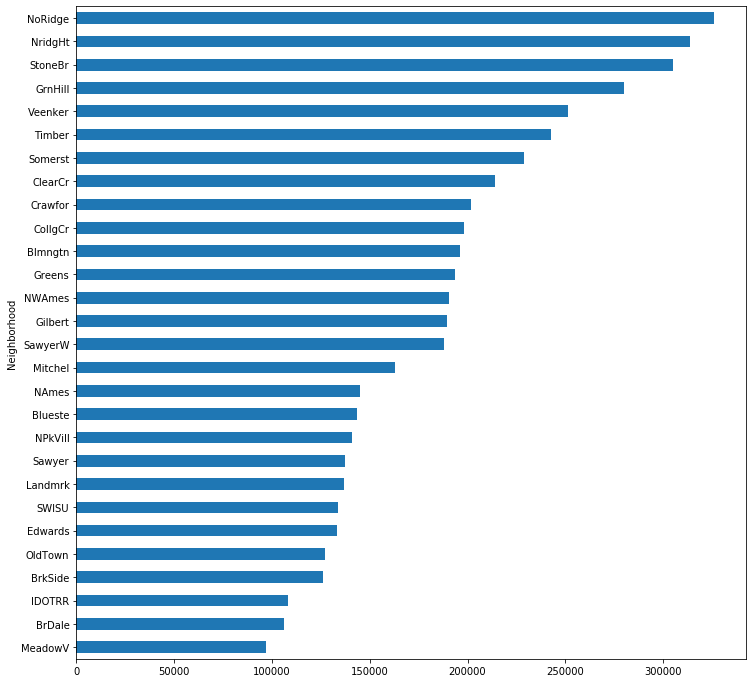

In [17]:
hoods=((housing.groupby('Neighborhood')['SalePrice'].sum()/housing.groupby('Neighborhood')['PID'].count()))
hoods.sort_values(ascending=True).plot(kind='barh', figsize = (12,12))